<a href="https://colab.research.google.com/github/mdharisul/6220/blob/main/6220_Term_Project_Haris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [259]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Bioinformatics data analysis and visualization toolkit
#!pip install bioinfokit

In [261]:
#from bioinfokit.visuz import cluster

## **Upload File**

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [262]:
#read cvs file into dataframe
#df = pd.read_csv('https://raw.githubusercontent.com/myconcordia/INSE6220/main/seeds.csv')
df1 = pd.read_csv('https://raw.githubusercontent.com/mdharisul/6220/main/MaternalHealthRiskDataSet.csv', nrows=200)
df = df1.drop(['BodyTemp'], axis=1)
df.head(n=5)

,Age,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel
0,25,130,80,15.0,86,high risk
1,35,140,90,13.0,70,high risk
2,29,90,70,8.0,80,high risk
3,30,140,85,7.0,70,high risk
4,35,120,60,6.1,76,low risk


In [263]:
df.tail(n=3)

,Age,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel
197,23,120,90,6.1,70,low risk
198,29,130,70,6.1,78,mid risk
199,17,85,60,9.0,86,high risk


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   SystolicBP   200 non-null    int64  
 2   DiastolicBP  200 non-null    int64  
 3   BS           200 non-null    float64
 4   HeartRate    200 non-null    int64  
 5   RiskLevel    200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [265]:
data_dup = df.duplicated().any()
data_dup

True

In [266]:
df = df.drop_duplicates()
data_dup = df.duplicated().any()
data_dup

False

In [267]:
RiskLevel = {'low risk':1, 
        'mid risk':2, 
        'high risk':3}

# apply using map
df['RiskLevel'] = df['RiskLevel'].map(RiskLevel).astype(float)
df.head(n=3)

,Age,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel
0,25,130,80,15.0,86,3.0
1,35,140,90,13.0,70,3.0
2,29,90,70,8.0,80,3.0


In [268]:
df['RiskLevel'].value_counts()

1.0    58
2.0    50
3.0    49
Name: RiskLevel, dtype: int64

### **Classes**

In [269]:
y = df['RiskLevel']
mcc_y = y.copy()
target = df['RiskLevel'].to_numpy()

### **Features**

Data Matrix

In [270]:
X = df.iloc[:,0:5]
X.head(3)

,Age,SystolicBP,DiastolicBP,BS,HeartRate
0,25,130,80,15.0,86
1,35,140,90,13.0,70
2,29,90,70,8.0,80


In [271]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,157.0,29.617834,13.128329,10.0,20.0,25.0,35.0,63.0
SystolicBP,157.0,113.337580,19.307417,70.0,95.0,120.0,120.0,160.0
DiastolicBP,157.0,77.165605,13.822523,49.0,65.0,80.0,90.0,100.0
BS,157.0,8.617006,3.330965,6.0,6.9,7.1,7.9,19.0
HeartRate,157.0,74.949045,7.870585,60.0,70.0,76.0,80.0,90.0


Notice that the data is not standardizd. So we need to standarize it.

In [272]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [273]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,157.0,-8.910070e-17,1.0032,-1.499095,-0.734946,-0.352871,0.411278,2.550895
SystolicBP,157.0,6.505765e-17,1.0032,-2.251791,-0.952808,0.346175,0.346175,2.424547
DiastolicBP,157.0,4.370177e-16,1.0032,-2.044181,-0.882946,0.205712,0.931484,1.657256
BS,157.0,-1.242813e-16,1.0032,-0.788174,-0.517118,-0.456883,-0.215944,3.127087
HeartRate,157.0,-7.198771e-16,1.0032,-1.905434,-0.630815,0.133957,0.643805,1.918424


Notice that the data is now standardizd.

**Observations and variables**

In [274]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156]
['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']


## **Data Visualisation**

### Class Distribution

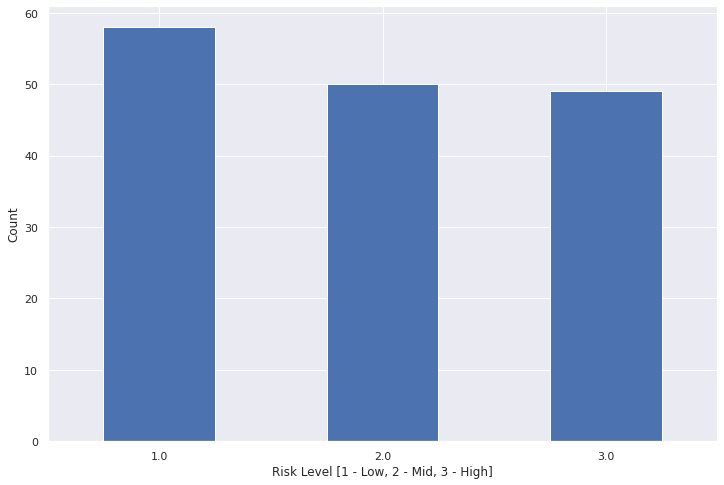

In [275]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Risk Level [1 - Low, 2 - Mid, 3 - High]')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

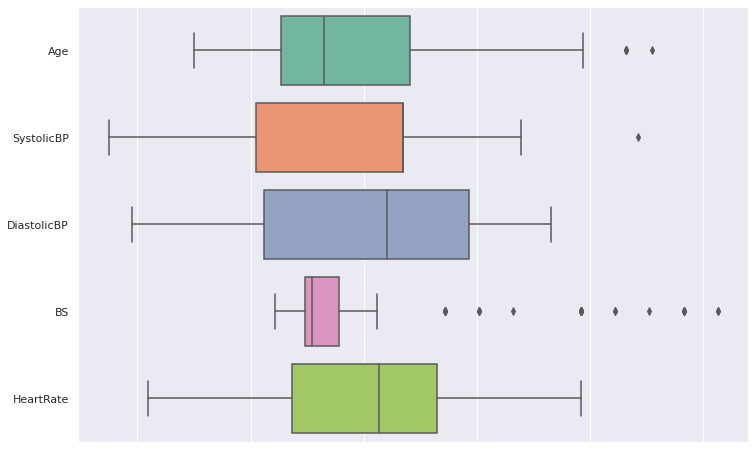

In [276]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="h", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

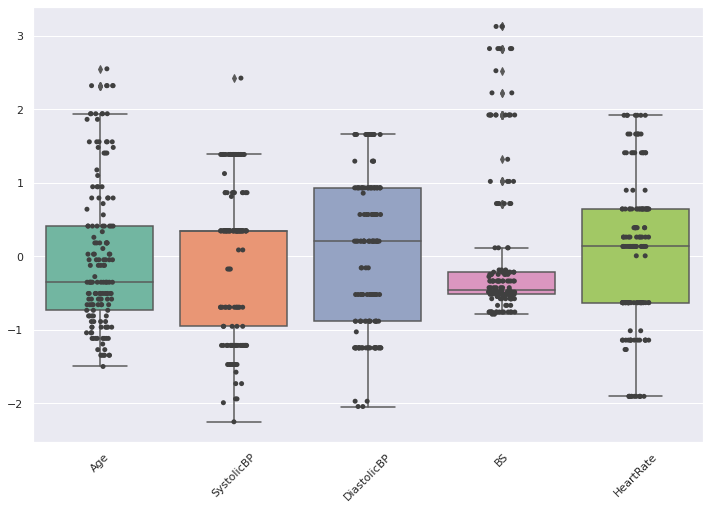

In [277]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Five Number Summary

In [278]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,HeartRate
count,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02
mean,-8.910070e-17,6.505765e-17,4.370177e-16,-1.242813e-16,-7.198771e-16
std,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00
min,-1.499095e+00,-2.251791e+00,-2.044181e+00,-7.881742e-01,-1.905434e+00
25%,-7.349459e-01,-9.528080e-01,-8.829455e-01,-5.171176e-01,-6.308148e-01
50%,-3.528714e-01,3.461748e-01,2.057124e-01,-4.568828e-01,1.339568e-01
75%,4.112777e-01,3.461748e-01,9.314844e-01,-2.159437e-01,6.438046e-01
max,2.550895e+00,2.424547e+00,1.657256e+00,3.127087e+00,1.918424e+00


### Pair Plot

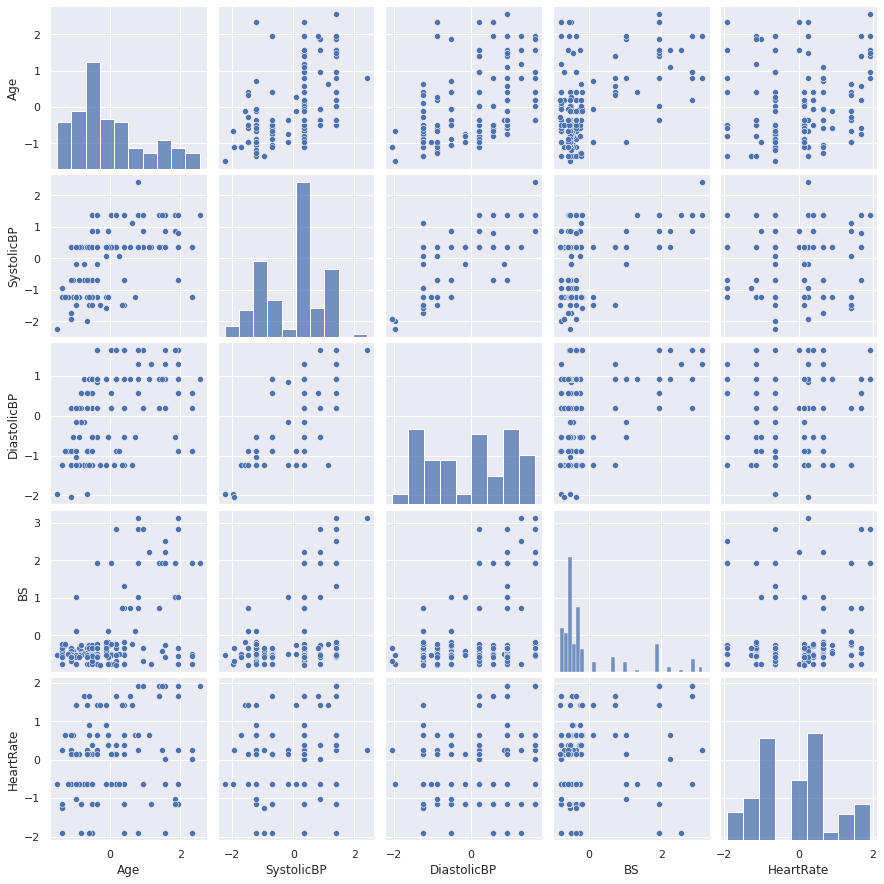

In [279]:
sns.pairplot(df)

## **Covariance**

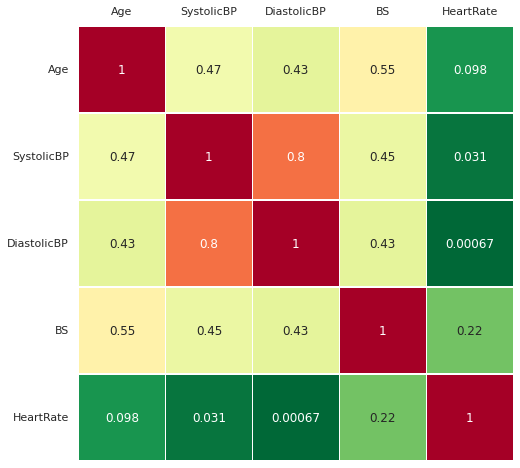

In [280]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

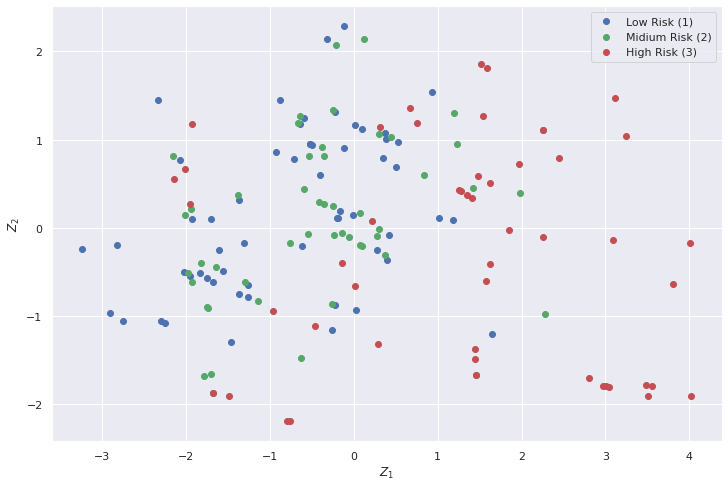

In [281]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Low Risk)->1,  2(Mideum Risk)->2, 3(High Risk)->3
idx_Low = np.where(y == 1)
idx_Mid = np.where(y == 2)
idx_High = np.where(y == 3)

plt. figure()
plt.scatter(Z[idx_Low,0], Z[idx_Low,1], c='b', label='Low Risk (1)')
plt.scatter(Z[idx_Mid,0], Z[idx_Mid,1], c='g', label='Midium Risk (2)')
plt.scatter(Z[idx_High,0], Z[idx_High,1], c='r', label='High Risk (3)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

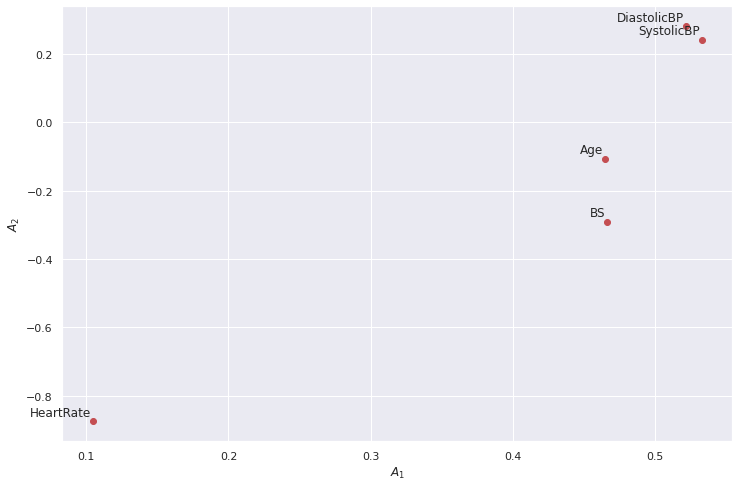

In [282]:
A = pca.components_.T 
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


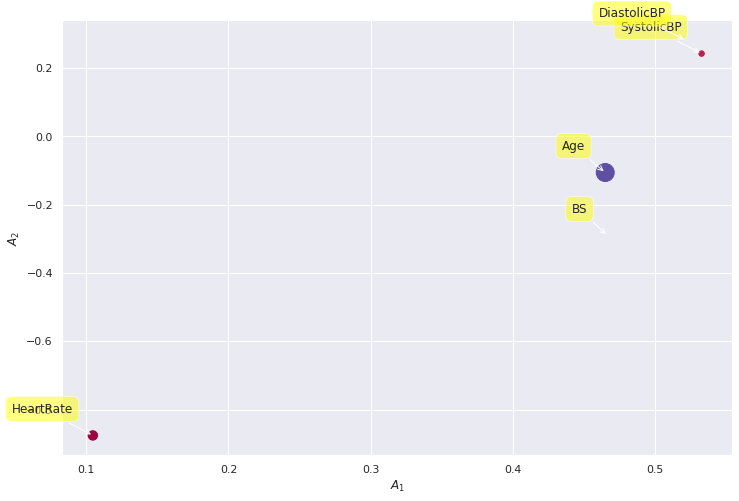

In [283]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

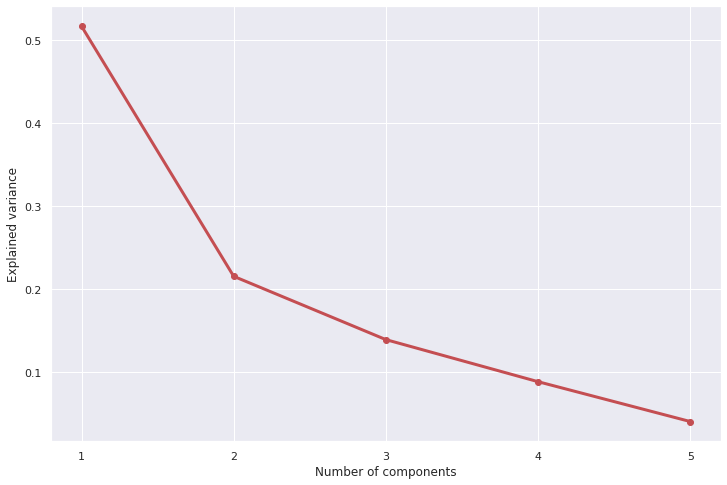

In [284]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()


### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

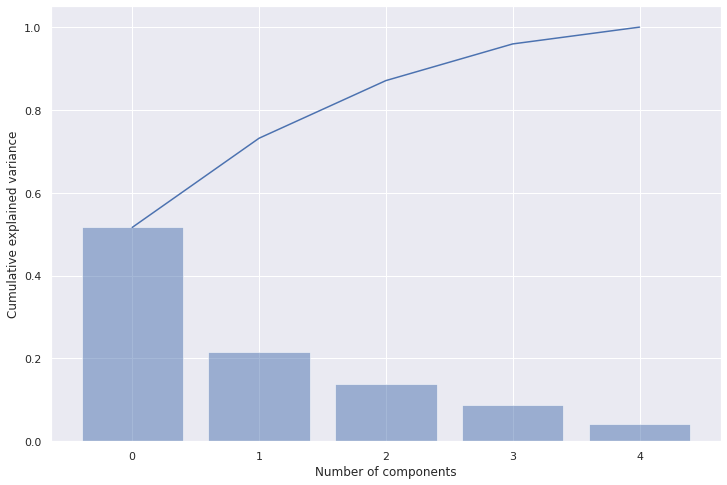

In [286]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [287]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (51.6%)',
 '1': 'PC 2 (21.5%)',
 '2': 'PC 3 (13.9%)',
 '3': 'PC 4 (8.9%)',
 '4': 'PC 5 (4.1%)'}

### **Biplot**

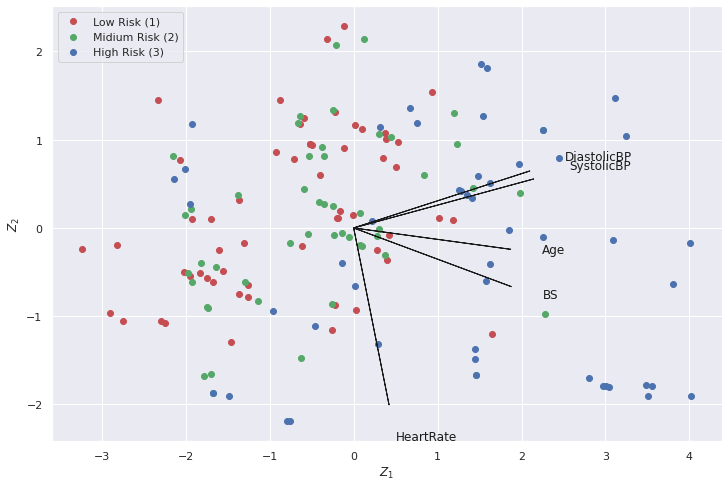

In [289]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Low,0], Z[idx_Low,1], c='r', label='Low Risk (1)')
plt.scatter(Z[idx_Mid,0], Z[idx_Mid,1], c='g', label='Midium Risk (2)')
plt.scatter(Z[idx_High,0], Z[idx_High,1], c='b', label='High Risk (3)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

In [291]:
cluster.biplot(cscore=Z, loadings=A, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2), 
               var2=round(pca.explained_variance_ratio_[1]*100, 2), colorlist=target)

**Using PCA Librarry**

In [ ]:
!pip install pca

In [292]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [293]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC      feature   loading  type
0  PC1   SystolicBP  0.532610  best
1  PC2    HeartRate -0.875407  best
2  PC3          Age  0.591655  best
3  PC4           BS -0.737940  best
4  PC1  DiastolicBP  0.521352  weak


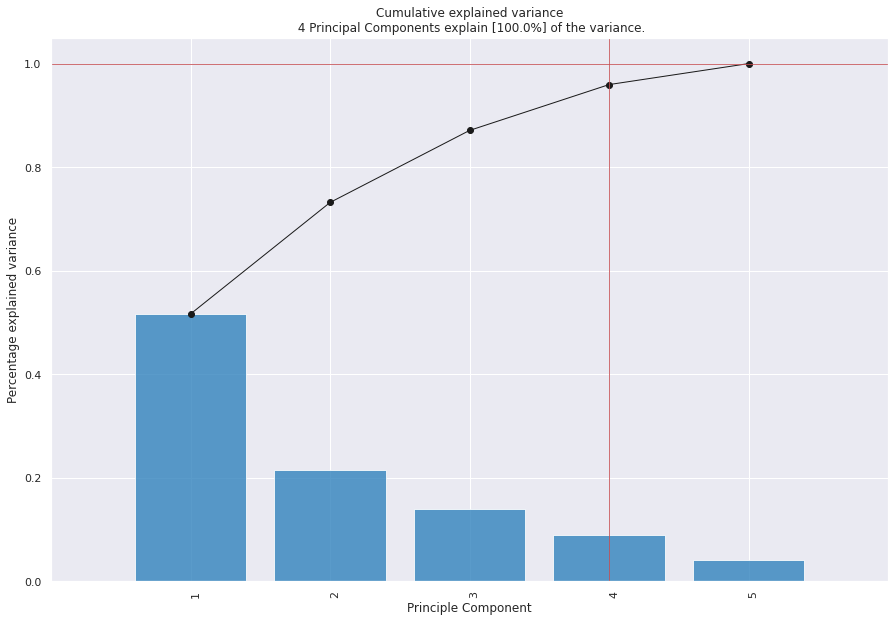

<Figure size 864x576 with 0 Axes>

In [294]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.


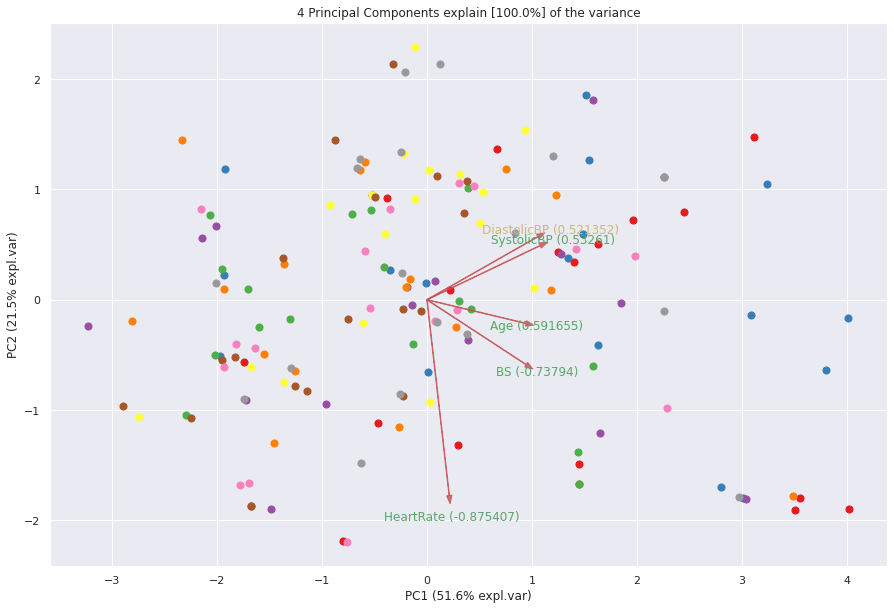

In [229]:
 ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


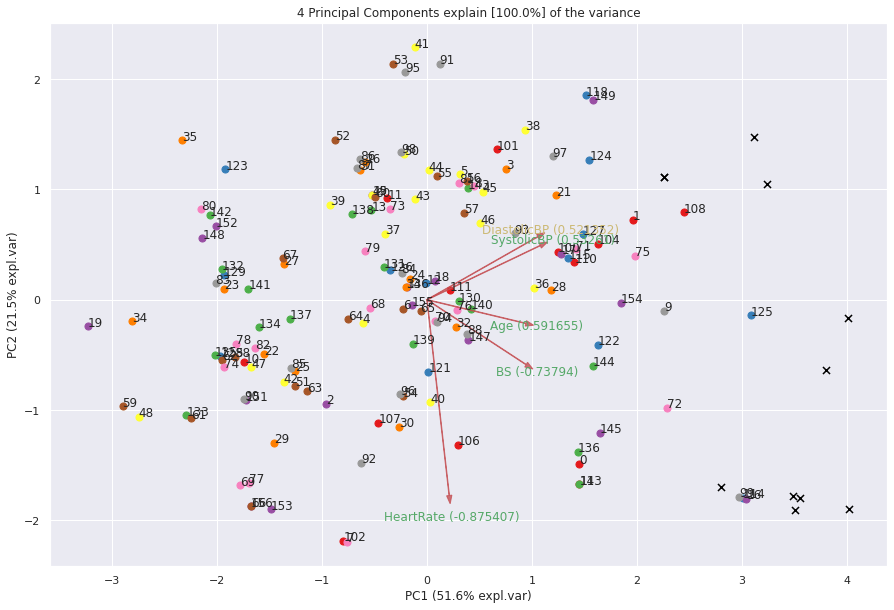

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3467fa7e90>)

In [230]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


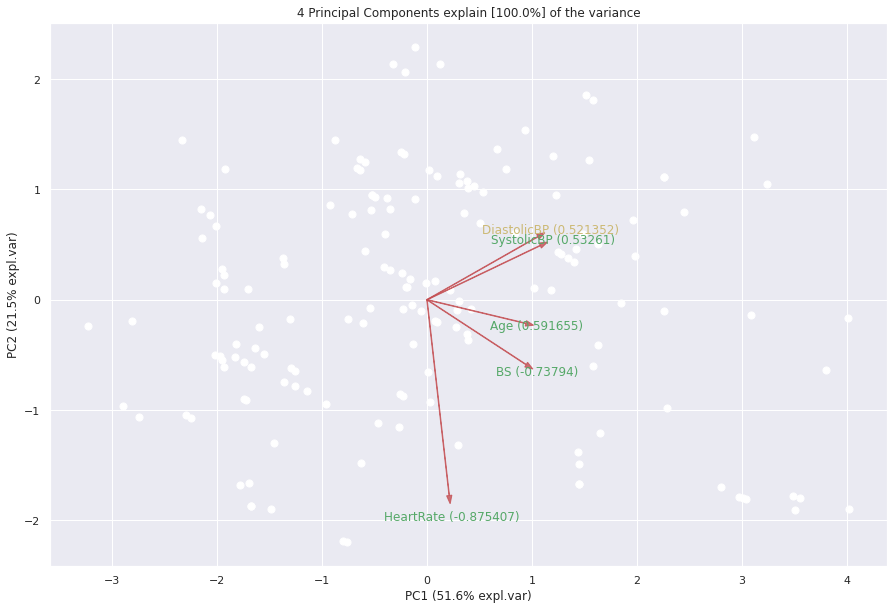

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3467d1d750>)

In [231]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


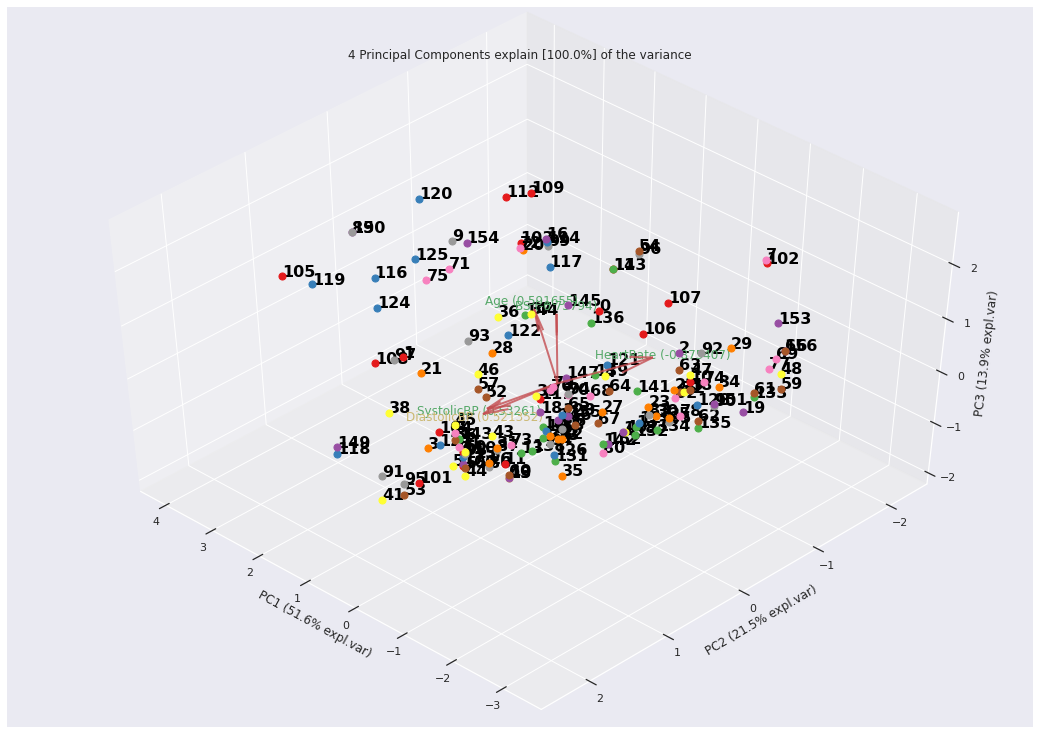

In [232]:
ax = model.biplot3d(legend=False)

### **Principal components**

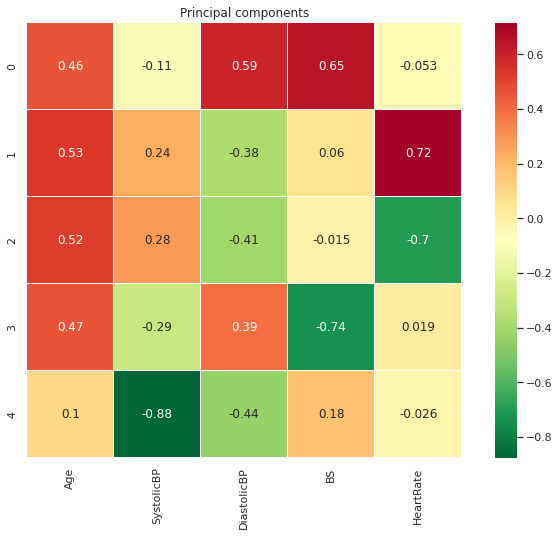

PC1:[0.46486846 0.53261023 0.52135182 0.46632015 0.10469693]
PC2:[-0.10571785  0.24242216  0.28196758 -0.29019453 -0.87540656]


In [238]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

### **Hotelling's T2 test**

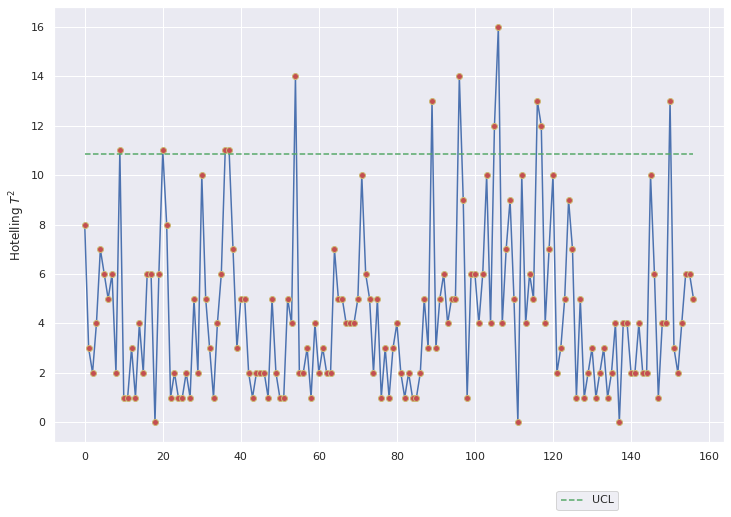

In [239]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [240]:
print(np.argwhere(Tsquare>UCL))

[[  9]
 [ 20]
 [ 36]
 [ 37]
 [ 54]
 [ 89]
 [ 96]
 [105]
 [106]
 [116]
 [117]
 [150]]


### **Control Charts for Principal Components**

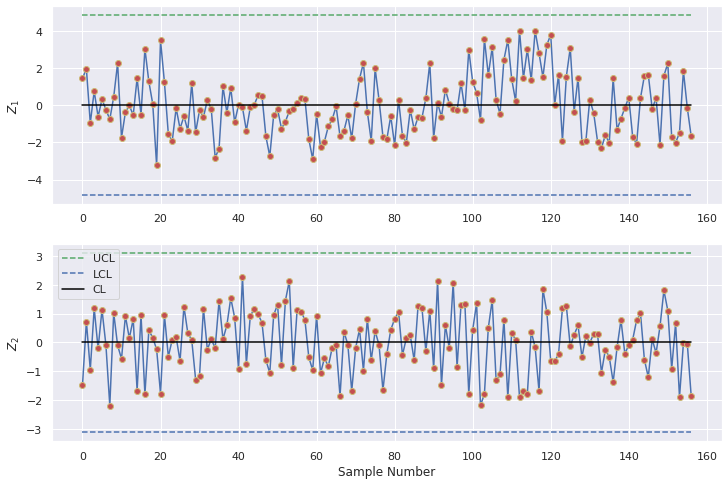

In [241]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [243]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[]


## **Multi-Class Classification**

In [295]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, mcc_y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, mcc_y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], mcc_y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 109
Test Dataset Size: 48


### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

         1.0      0.621     0.947     0.750        19
         2.0      0.375     0.200     0.261        15
         3.0      0.818     0.643     0.720        14

    accuracy                          0.625        48
   macro avg      0.605     0.597     0.577        48
weighted avg      0.602     0.625     0.588        48



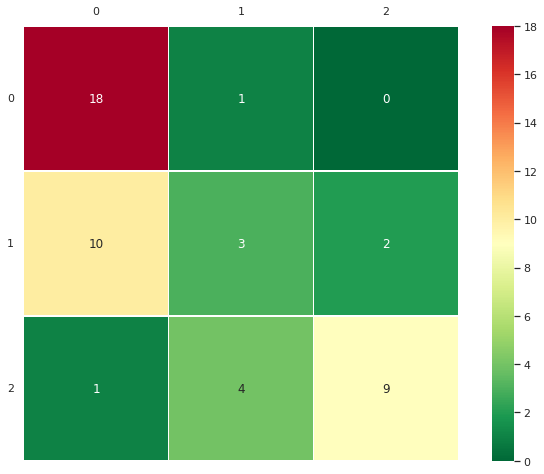

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

         1.0      0.500     0.684     0.578        19
         2.0      0.300     0.200     0.240        15
         3.0      0.833     0.714     0.769        14

    accuracy                          0.542        48
   macro avg      0.544     0.533     0.529        48
weighted avg      0.535     0.542     0.528        48



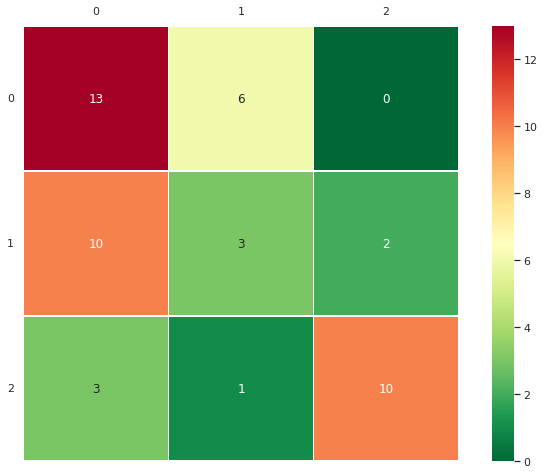

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

         1.0      0.545     0.632     0.585        19
         2.0      0.250     0.200     0.222        15
         3.0      0.714     0.714     0.714        14

    accuracy                          0.521        48
   macro avg      0.503     0.515     0.507        48
weighted avg      0.502     0.521     0.509        48



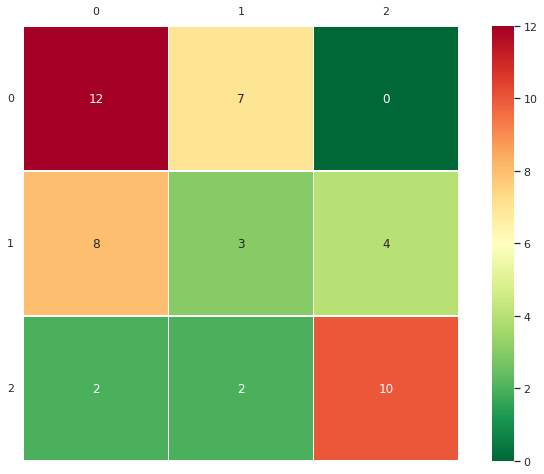

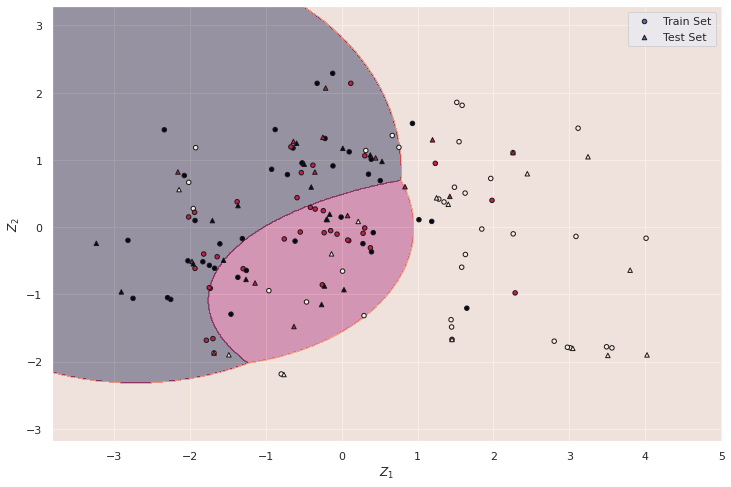

(array([ 7,  9, 10, 11, 16, 17, 18, 21, 23, 24, 28, 29, 30, 31, 33, 34, 37,
       38, 39, 42, 43, 46, 47]),)


In [296]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

Grid Search Results:
k_full_data: {'n_neighbors': 16}
k_Z: {'n_neighbors': 16}
k_Z12: {'n_neighbors': 16}
                                    0         1         2         3         4
knn_full_data fit_time       0.002143  0.003204  0.003196  0.002040  0.002027
knn_Z  fit_time              0.000903  0.000862  0.000830  0.000820  0.000829
knn_Z12 fit_time             0.000807  0.001221  0.001376  0.001301  0.001289
knn_full_data test_f1_macro  0.433333  0.643427  0.544064  0.707843  0.670437
knn_Z  test_f1_macro         0.433333  0.643427  0.544064  0.707843  0.670437
knn_Z12 test_f1_macro        0.636364  0.607620  0.540401  0.667112  0.571429

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

         1.0      0.538     0.737     0.622        19
         2.0      0.364     0.267     0.308        15
         3.0      0.818     0.643     0.720        14

    accuracy                          0.562        48
   macro avg      0.573     0.549

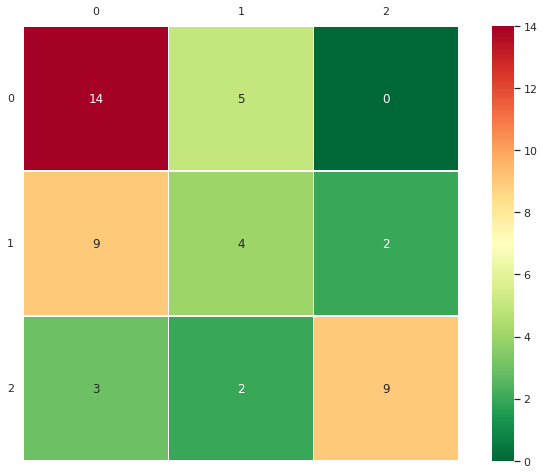

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

         1.0      0.538     0.737     0.622        19
         2.0      0.364     0.267     0.308        15
         3.0      0.818     0.643     0.720        14

    accuracy                          0.562        48
   macro avg      0.573     0.549     0.550        48
weighted avg      0.565     0.562     0.552        48



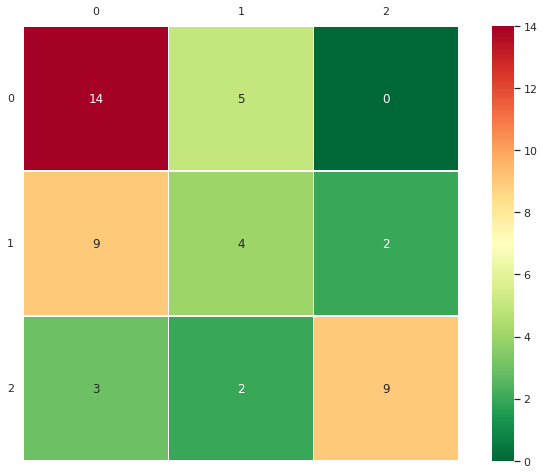

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

         1.0      0.500     0.579     0.537        19
         2.0      0.154     0.133     0.143        15
         3.0      0.692     0.643     0.667        14

    accuracy                          0.458        48
   macro avg      0.449     0.452     0.449        48
weighted avg      0.448     0.458     0.451        48



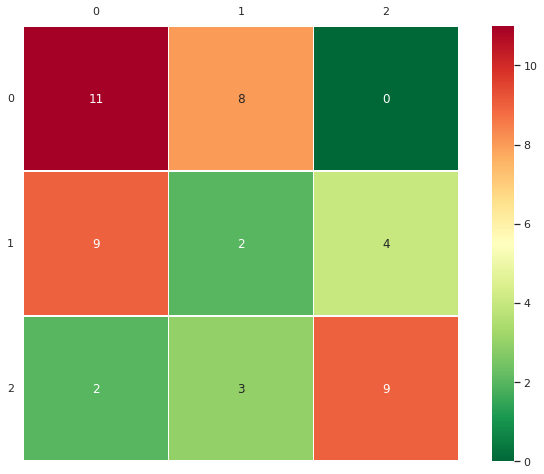

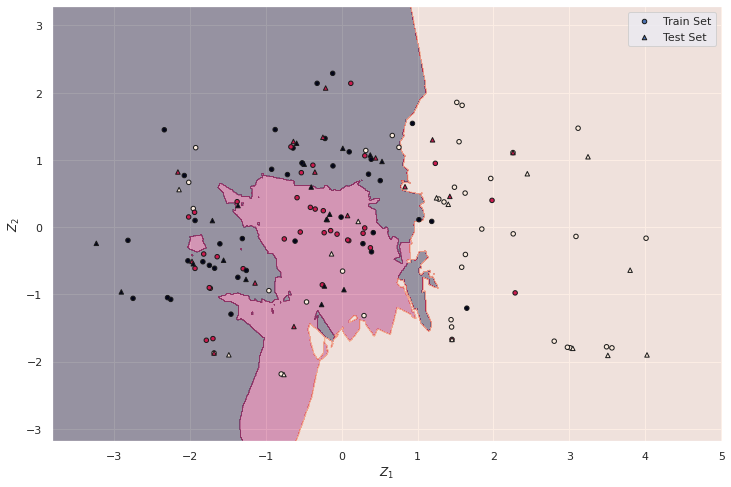

In [297]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)

Grid Search Results:
depth_full_data: {'max_depth': 8}
depth_Z: {'max_depth': 8}
depth_Z12: {'max_depth': 8}
                                   0         1         2         3         4
dt_full_data fit_time       0.002109  0.002013  0.001957  0.002115  0.002386
dt_Z  fit_time              0.000995  0.001049  0.000980  0.000979  0.001384
dt_Z12 fit_time             0.000845  0.000829  0.000808  0.000869  0.000851
dt_full_data test_f1_macro  0.603749  0.814815  0.719577  0.804233  0.761172
dt_Z  test_f1_macro         0.440523  0.452381  0.402116  0.479739  0.442308
dt_Z12 test_f1_macro        0.682181  0.597884  0.453566  0.587179  0.333822

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

         1.0      0.944     0.895     0.919        19
         2.0      0.750     0.800     0.774        15
         3.0      0.857     0.857     0.857        14

    accuracy                          0.854        48
   macro avg      0.851     0.851    

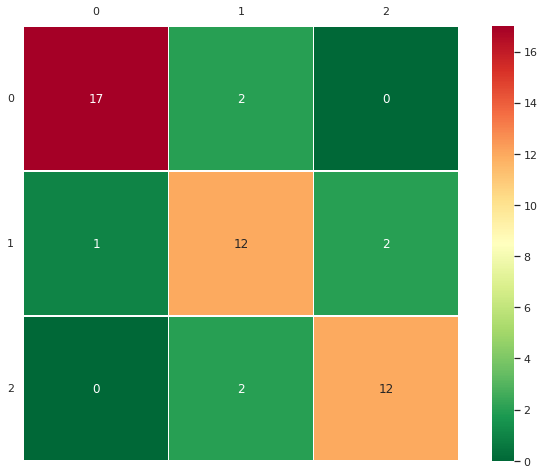

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

         1.0      0.560     0.737     0.636        19
         2.0      0.250     0.133     0.174        15
         3.0      0.600     0.643     0.621        14

    accuracy                          0.521        48
   macro avg      0.470     0.504     0.477        48
weighted avg      0.475     0.521     0.487        48



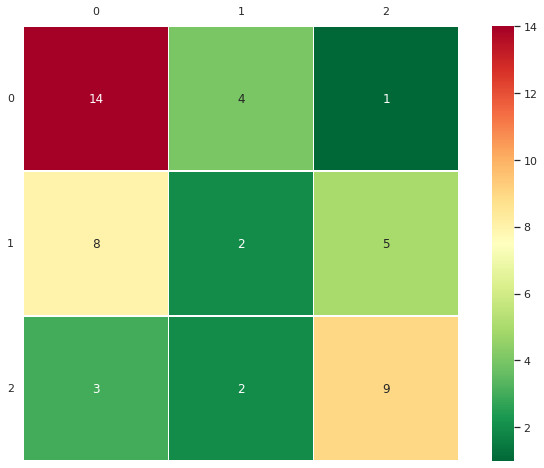

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

         1.0      0.545     0.632     0.585        19
         2.0      0.200     0.133     0.160        15
         3.0      0.562     0.643     0.600        14

    accuracy                          0.479        48
   macro avg      0.436     0.469     0.448        48
weighted avg      0.442     0.479     0.457        48



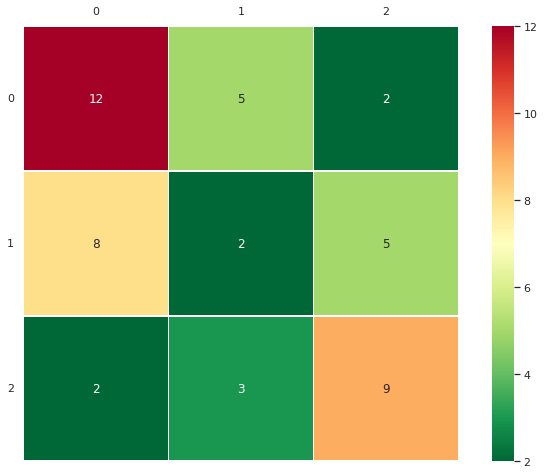

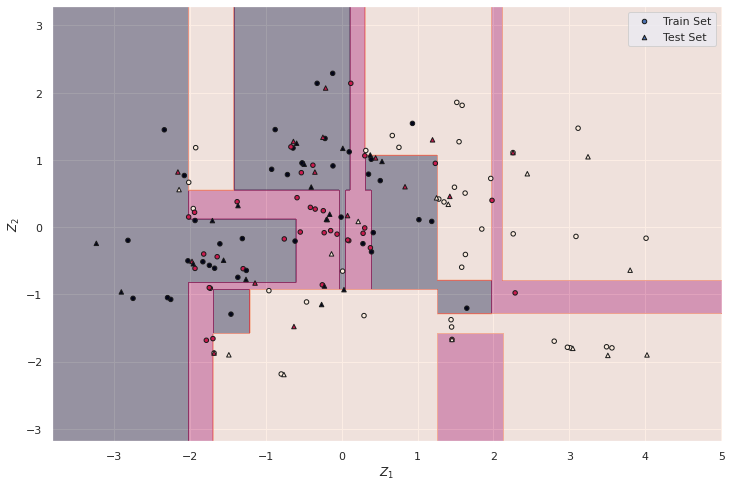

In [298]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

DATASET: FULL DATA


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


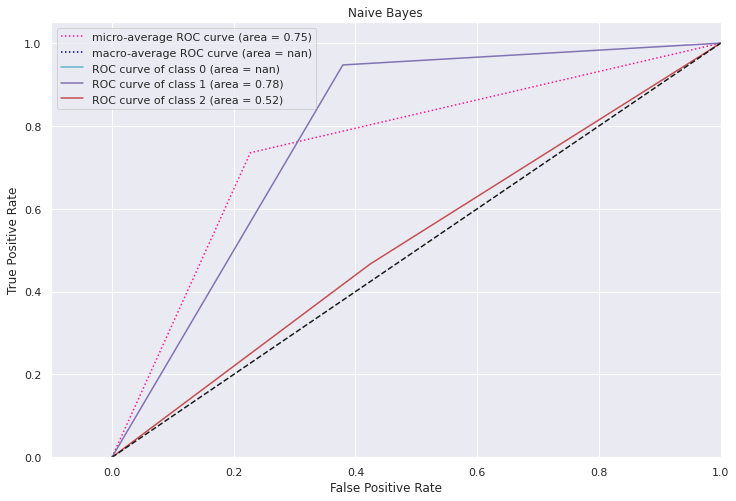

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


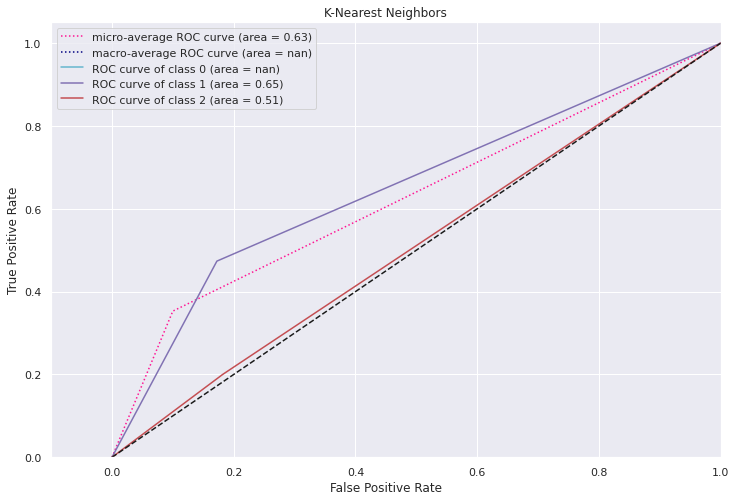

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


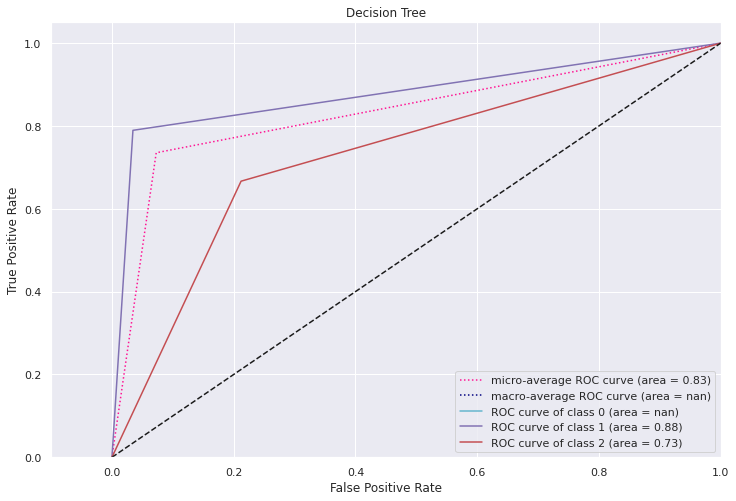

DATASET: Z


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


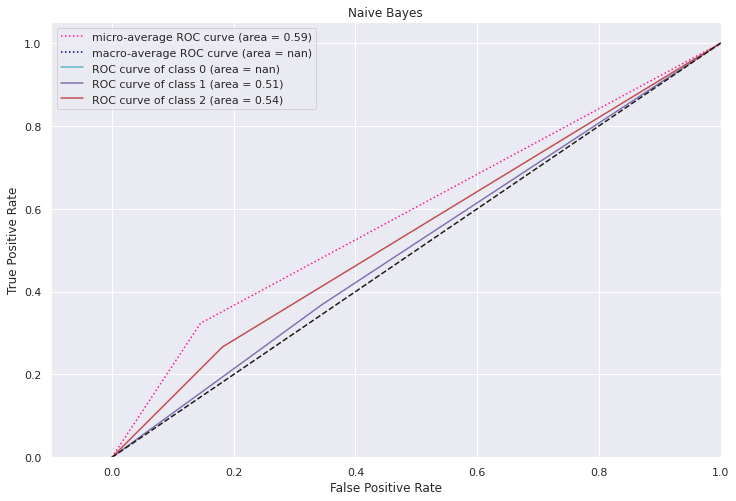

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


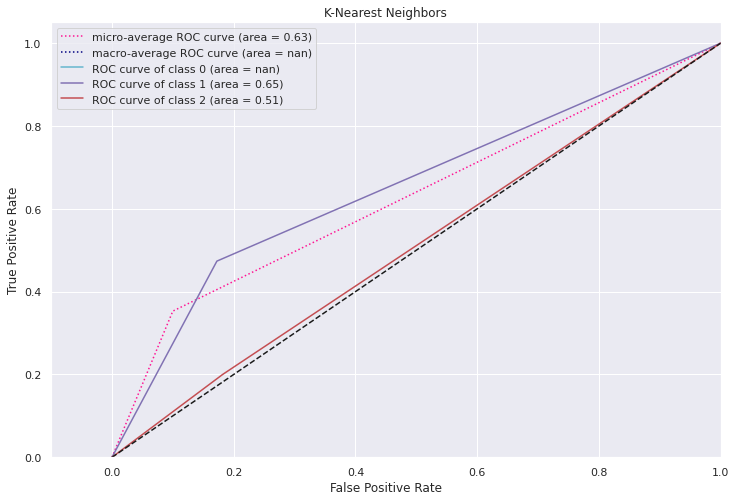

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


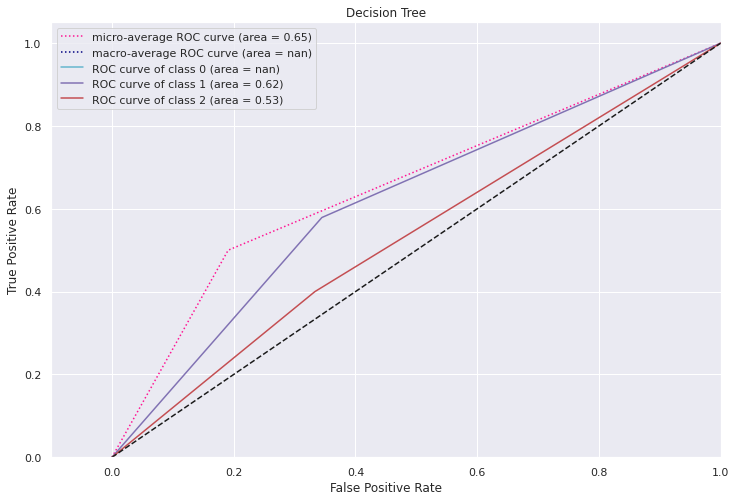

DATASET: Z12


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


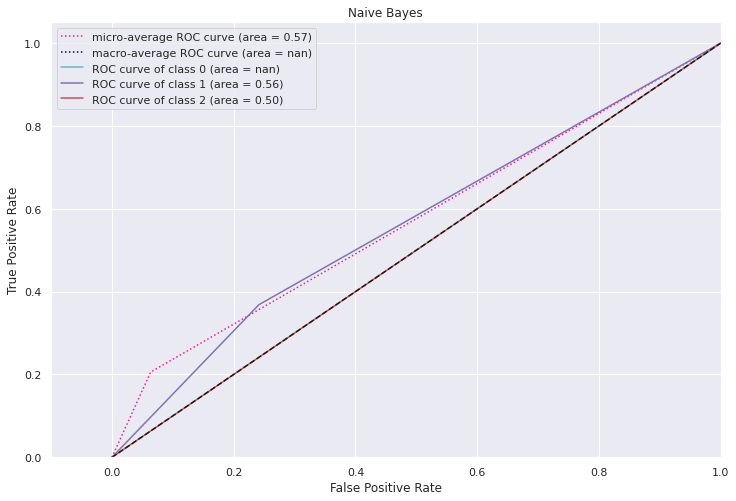

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


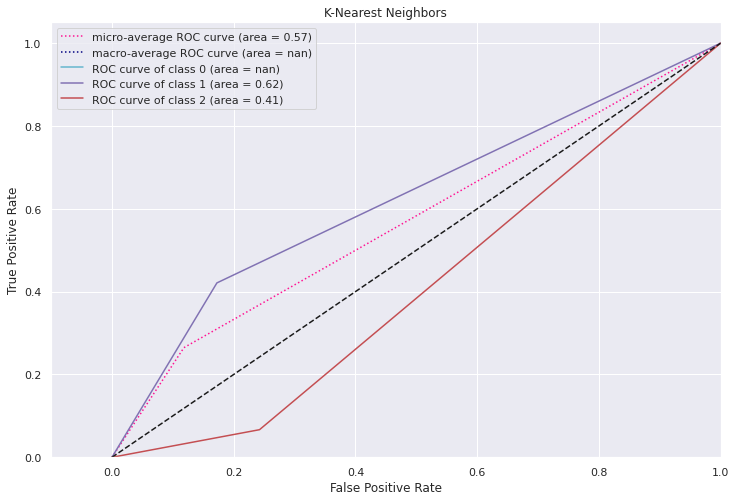

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


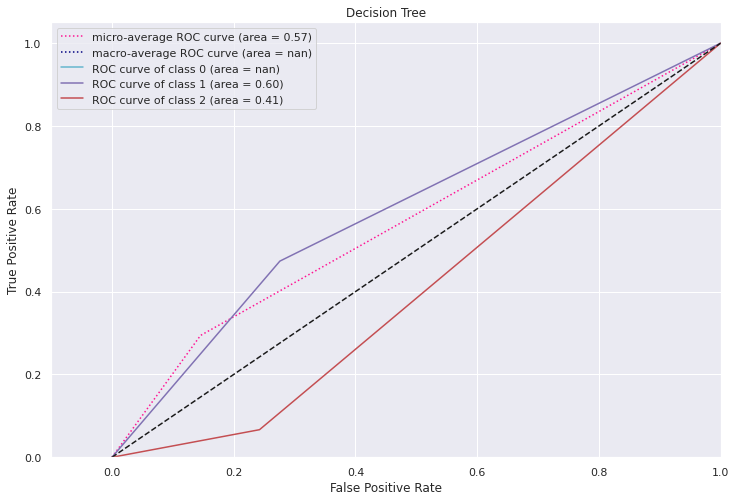

In [299]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

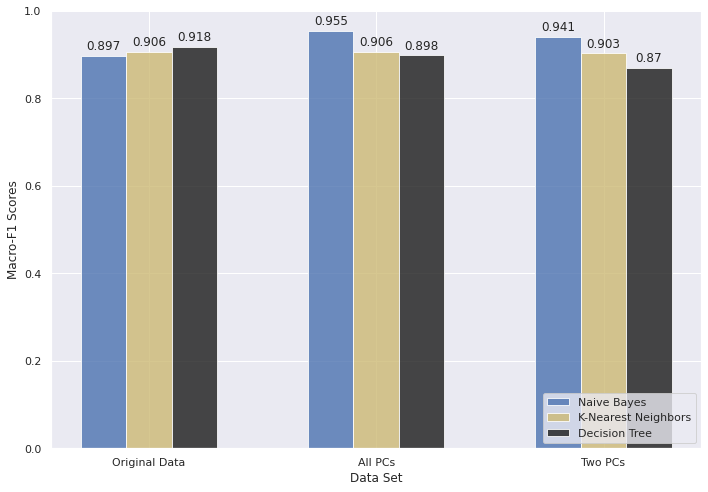

In [300]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()